# Visualizing multiband imagery

You may remember we covered the use of single band imagery in week 2. 

In this tutorial we are going to begin loading multiband imagery using the python package `rasterio`, and then visualizing these images using `pyplot`.

We will achieve this by (i) recapping loading single band images, (ii) loading true composite images, and (iii) producing false composite images.


## Raster graphics

First, let us understand more about what raster graphics are.

For example, once we have downloaded a set of images, we need to check that they can be successfully opened. This requires us to access and display the raster graphics style our data are in. 

Importantly, raster graphics are based on a two-dimensional image represented by a rectangular matrix (thus, a grid of square pixels). 

See here for more information: https://en.wikipedia.org/wiki/Raster_graphics

These graphics can then be interpreted by a computer to display the underlaying data as an image. 

It is important to know the difference between vector and raster graphics. Let us watch the following short video to clarify the difference.

In [98]:
%%HTML

<iframe width="560" height="315" src="https://www.youtube.com/embed/-Fs2t6P5AjY" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Rasterio 

To interpret our asset data we can use `rasterio` to both read and write geospatial raster data. 

You can think of `rasterio` as standing for Raster Input-Output.

The GeoTIFF standard (and other raster formats) are common for geographic information systems to organize and store gridded, or raster, datasets. We are able to use `rasterio` to read and write these formats and then provide a Python API based on N-D arrays.

An ndarray is a (usually fixed-size) multidimensional container of items of the same type and size. Remember we covered an introduction to `numpy` in a previous lecture. Well, `numpy` uses N-D arrays as its basic data structure. `rasterio` heavily uses `numpy` in its operations.   

You can see the GitHub code here: https://github.com/rasterio/rasterio

Or, more usefully, you can access the `rasterio` documentation here: https://rasterio.readthedocs.io/en/latest/

Remember, you may need to install `rasterio` into your virtual conda environment, if not already installed.

## Recapping single band imagery

First, we will need to load in our `rasterio` package again, as follows:

In [99]:
# Example
import rasterio

And then we can specify the path to the image file we want to visualize.

This this case, let us explore a post-event image of Lahaina, Maui following the recent wildfire disaster. 

(`maxar_maui_lahaina_2023_8_12.tif` in the `files` folder)

In [100]:
# Example
filepath = "files/maxar_maui_lahaina_2023_8_12.tif"
filepath #here we have just allocated the string to the filename object

'files/maxar_maui_lahaina_2023_8_12.tif'

Now we have the path to the file, we can use `rasterio` to load it in:

In [101]:
# Example
my_raster_image = rasterio.open(filepath)
my_raster_image.read() #this is all our layers in one very large list of lists for blue, green and red

array([[[ 58,  50,  44, ...,  97, 107, 112],
        [ 57,  52,  46, ..., 105, 111, 109],
        [ 58,  57,  54, ..., 107, 110, 108],
        ...,
        [ 35,  36,  26, ..., 106, 102,  99],
        [ 41,  46,  63, ..., 106, 103, 101],
        [ 42,  55,  98, ..., 104, 105, 104]],

       [[ 73,  65,  59, ...,  73,  80,  88],
        [ 73,  68,  62, ...,  78,  82,  82],
        [ 77,  76,  73, ...,  78,  81,  81],
        ...,
        [ 54,  55,  45, ..., 120, 116, 114],
        [ 62,  65,  82, ..., 120, 117, 116],
        [ 62,  75, 119, ..., 120, 119, 120]],

       [[ 70,  62,  56, ...,  63,  71,  78],
        [ 72,  67,  61, ...,  69,  74,  73],
        [ 75,  74,  71, ...,  70,  73,  72],
        ...,
        [ 60,  59,  49, ...,  87,  83,  81],
        [ 67,  69,  86, ...,  87,  84,  83],
        [ 69,  82, 124, ...,  84,  86,  84]]], dtype=uint8)

We can load in the blue layer from our image (layer zero), and then visualize it. 

If you do not already have `matplotlib`, you will need to install it to use `pyplot` functions. 

In [102]:
# Example
import sys
!conda install --yes --prefix {sys.prefix} matplotlib

Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.7.4

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.7.4




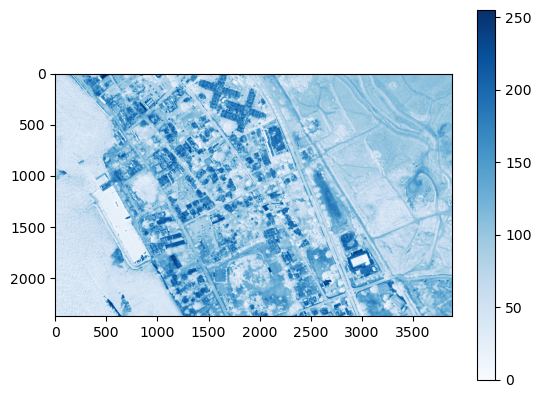

In [103]:
# Example
from matplotlib import pyplot

# Let us just get our blue band
blue = my_raster_image.read()[0]

# Use imshow to load the blue band.
fig = pyplot.imshow(blue, cmap="Blues")

# Add the colorbar to our plot
pyplot.colorbar() 

# Export the layer to a .png image.
pyplot.savefig('export_blues.png', bbox_inches='tight')

Not that we use `pyplot.savefig()` to export the image to a .png. Please go inspect this exported image. 


We can also load in the green layer from our image (layer 1), and then visualize it. 

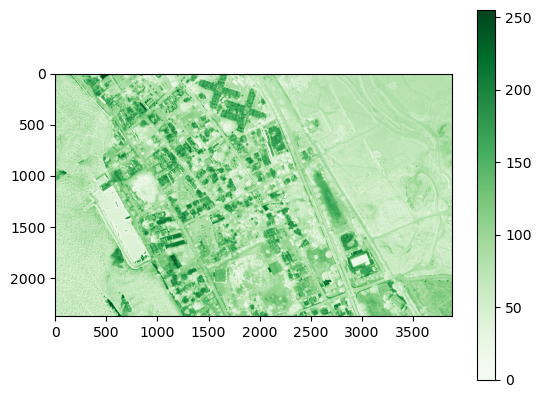

In [104]:
# Example
green = my_raster_image.read()[1]

# Use imshow to load the green band.
fig = pyplot.imshow(green, cmap='Greens')

# Add the colorbar to our plot
pyplot.colorbar() 

# Export the layer to a .png image.
pyplot.savefig('export_greens.png', bbox_inches='tight')

Finally, we can also load in the red layer from our image (layer 2), and then visualize it. 

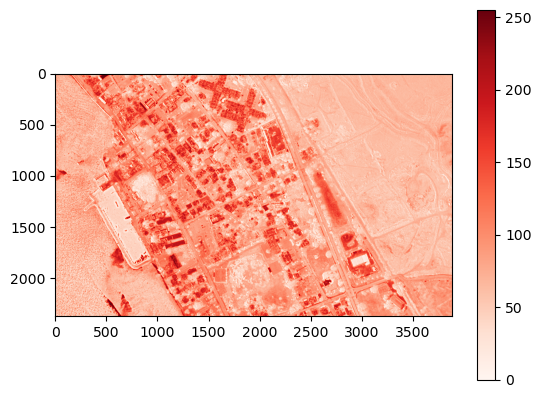

In [105]:
# Example
red = my_raster_image.read()[2]

# Use imshow to load the red band.
fig = pyplot.imshow(red, cmap='Reds')

# Add the colorbar to our plot
pyplot.colorbar() 

# Export the layer to a .png image.
pyplot.savefig('export_reds.png', bbox_inches='tight')

## Exercise 1

Go to Maxar's Open Data Program and download images for the Morocco 2023 Earthquake: https://www.maxar.com/open-data 

Put together the code to: 

- Load in one image of a badly affected area.
- Inspect the image and think critically about the image quality/resolution.
- Export a set of images for three different bands.

This should take approximately 20 minutes.

## Downloading 8-band PlanetScope assets 

You can download a 8-band PlanetScope image from the Planet GUI or API. 

For more details, see here:

https://developers.planet.com/docs/data/psscene/

*The newest PSB.SD instrument consists of the next-generation “PSBlue” telescope with a larger 47 megapixel sensor and the same filter response as PS2.SD below, in the Red, Green, Blue and NIR bands..*

The constituent components of an 'analytic' 8-band asset include:

- Band 1 = Coastal Blue
- Band 2 = Blue
- Band 3 = Green 1
- Band 4 = Green
- Band 5 = Yellow
- Band 6 = Red
- Band 7 = Red Edge
- Band 8 = NIR

The 'analytic' component refers to this imagery being a radiometrically calibrated GeoTiff product suitable for analytic applications.

A GeoTIFF is essentially a normal Tag Image File Format (TIFF) file with a metadata standard which allows embedded georeferencing information.

https://en.wikipedia.org/wiki/GeoTIFF

Next, we need to load the `rasterio` package into our current environment using the `import` command: 

In [106]:
import rasterio

And now we want to specify the filename for one of the image assets that we have downloaded into our current directory.

In [107]:
# Example
# Here we can specify the name of our Planet PSScene analytic image
filepath = 'files/10300100EB15FF00-ms_clipped.tif'
filepath

'files/10300100EB15FF00-ms_clipped.tif'

Finally, we can load in our downloaded image using `rasterio`, via the open function.

If this is completed successfully, we should be able to print the `rasterio` object and see the following:

```<open DatasetReader name='20221001_154151_08_248f_1B_AnalyticMS.tif' mode='r'>```

Now have a go and see what you produce:

In [108]:
# Example
my_raster_image = rasterio.open(filepath)
my_raster_image.read()

array([[[   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        ...,
        [   0,    0,    0, ...,  335,  390,  438],
        [   0,    0,    0, ...,  333,  339,  492],
        [   0,    0,    0, ...,  387,  439,  481]],

       [[   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        ...,
        [   0,    0,    0, ...,  691,  784,  955],
        [   0,    0,    0, ...,  670,  738,  925],
        [   0,    0,    0, ...,  742,  798,  829]],

       [[   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        ...,
        [   0,    0,    0, ...,  918, 1084, 1316],
        [   0,    0,    0, ...,  970, 1026, 1133],
        [   0,    0,    0, ..., 1084, 1061, 1057]],

       ...,

       [[   0,    0,    

We are able to query the number of layers by checking the length of the list we have:

In [109]:
# Example
print(len(my_raster_image.read()))

8


Now we have a `rasterio` object, we can use a range of the `rasterio` package functions on this object. 

For example, let us unpack these different multiband layers into `numpy` arrays:

In [110]:
# Example
# Unpacking our image layers into separate variables:
coastal_blue, blue, green_1, green, yellow, red, red_edge, nir = my_raster_image.read()
blue

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 691, 784, 955],
       [  0,   0,   0, ..., 670, 738, 925],
       [  0,   0,   0, ..., 742, 798, 829]], dtype=uint16)

Again, we can plot each of these and export them. 


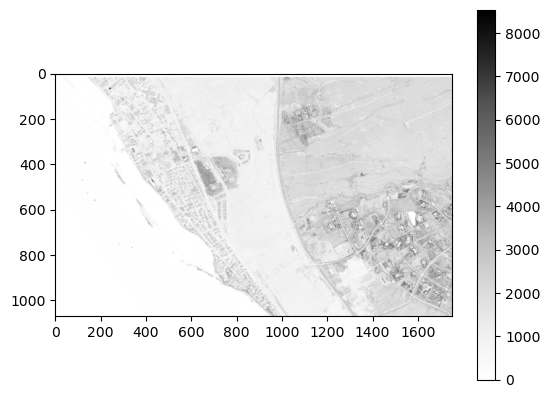

In [111]:
# Example
from matplotlib import pyplot

# Use imshow to load the blue band.
fig = pyplot.imshow(nir, cmap="Greys")

# Add the colorbar to our plot
pyplot.colorbar() 

# Export the layer to a .png image.
pyplot.savefig('export_nir.png', bbox_inches='tight')

Next, we can make a true color composite from multi-band satellite image, as follows:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


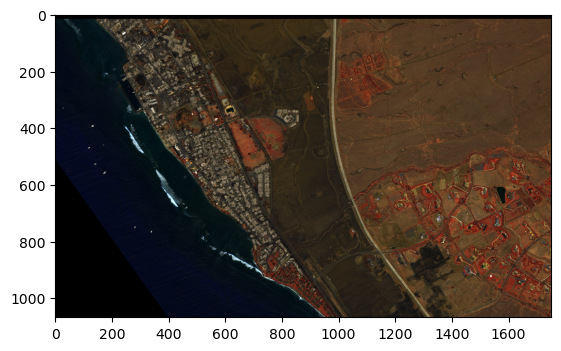

In [112]:
import numpy as np
from matplotlib import pyplot

def scale(band): # scale values for display purposes
    return band / 5000.0

my_raster_image = rasterio.open("files/10300100EB15FF00-ms_clipped.tif")

blue = scale(my_raster_image.read(2))
green = scale(my_raster_image.read(4))
red = scale(my_raster_image.read(6))

rgb = np.dstack((red, green, blue))

pyplot.imshow(rgb)

# Export the layer to a .png image.
pyplot.savefig('export_rgb.png', bbox_inches='tight')

We can also assemble false color composites, for example, for the Normalized Difference Vegetation Index (NDVI).

This can be achieved as follows by combining the Near-Infrared (NIR) and red bands:

- NDVI = (NIR - red) / (NIR + red)


C:\Users\eoughton\AppData\Local\Temp\ipykernel_8596\427079543.py:12: RuntimeWarning: invalid value encountered in true_divide
  ndvi = (nir - red) / (nir + red)


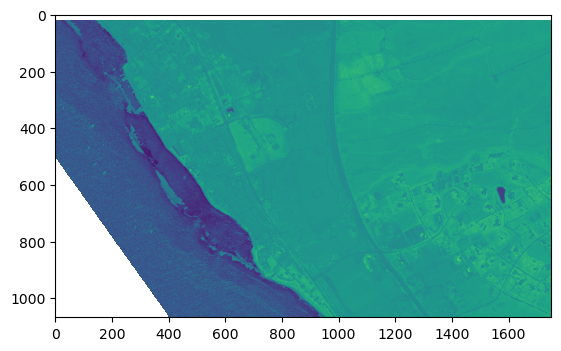

In [113]:
import numpy as np
from matplotlib import pyplot

def scale(band): # scale values for display purposes
    return band / 10000.0

my_raster_image = rasterio.open("files/10300100EB15FF00-ms_clipped.tif")

red = scale(my_raster_image.read(6))
nir = scale(my_raster_image.read(8))

ndvi = (nir - red) / (nir + red)

pyplot.imshow(ndvi)

# Export the layer to a .png image.
pyplot.savefig('export_ndvi.png', bbox_inches='tight')

Equally, we can also assemble false color composites, for example, for the Normalized Difference Water Index (NDWI).

This can be achieved as follows by combining the green and Near-Infrared (NIR) bands:

- NDWI = (green - NIR) / (green + NIR)

C:\Users\eoughton\AppData\Local\Temp\ipykernel_8596\872792189.py:12: RuntimeWarning: invalid value encountered in true_divide
  ndwi = (green - nir) / (green + nir)


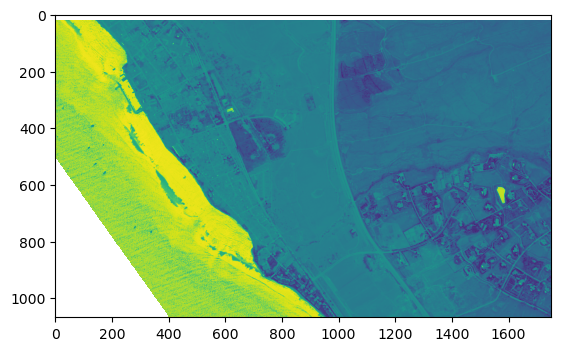

In [114]:
import numpy as np
from matplotlib import pyplot

def scale(band): # scale values for display purposes
    return band / 10000.0

my_raster_image = rasterio.open("files/10300100EB15FF00-ms_clipped.tif")

green = scale(my_raster_image.read(4))
nir = scale(my_raster_image.read(8))

ndwi = (green - nir) / (green + nir)

pyplot.imshow(ndwi)

# Export the layer to a .png image.
pyplot.savefig('export_ndwi.png', bbox_inches='tight')

## Exercise 2

You are a FEMA Federal Employee and you have just logged into your system. Your manager has emailed and asked you to immediately check the most up-to-date imagery for the Northern Lahaina area. 

Using the imgagery sources we have covered in this class so far, try obtain imagery to provide an initial damage assessment. 

Critically review the imagery you download. 

Load in and write out a true color composite of your imagery data.

If you complete this task, go find other images to compare your data against. 

In [115]:
# Enter your attempt here
